In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [18]:
# Load the dataset
df = pd.read_csv('train.csv')

In [19]:
# Display the first 5 rows of the dataset
print(df.head())

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

In [20]:
# EDA
# Check for missing values
print(df.isnull().sum())

# Check for the data types of the columns
print(df.dtypes)

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64
ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object


In [21]:
# Check for the distribution of the target variable
print(df['Reached.on.Time_Y.N'].value_counts())



Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


In [22]:
#split reached on time column in 1 and 0 in new columns
df['Reached.on.Time_Y'] = df['Reached.on.Time_Y.N'].map({1: 1, 0: 0})
df['Reached.on.Time_N'] = df['Reached.on.Time_Y.N'].map({1: 0, 0: 1})

# Drop the original column
df = df.drop('Reached.on.Time_Y.N', axis=1)
#drop reached on time n
df = df.drop('Reached.on.Time_N', axis=1)


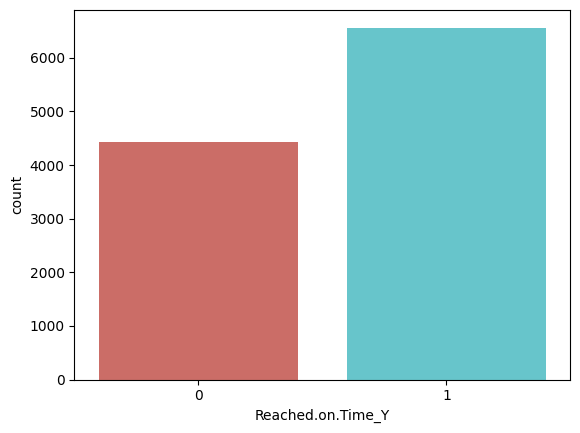

In [23]:
# Check for the distribution of the target variable in visual form with split columns
sns.countplot(x='Reached.on.Time_Y', data=df, palette='hls')
plt.show()


In [24]:
print(df.describe())

                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y  
count     10999.000000      10999.000000   10999.000000       10999.000000  
mean          3.567597         13.373216    3634.016729           0.596691  
std           1.522860         16.20552

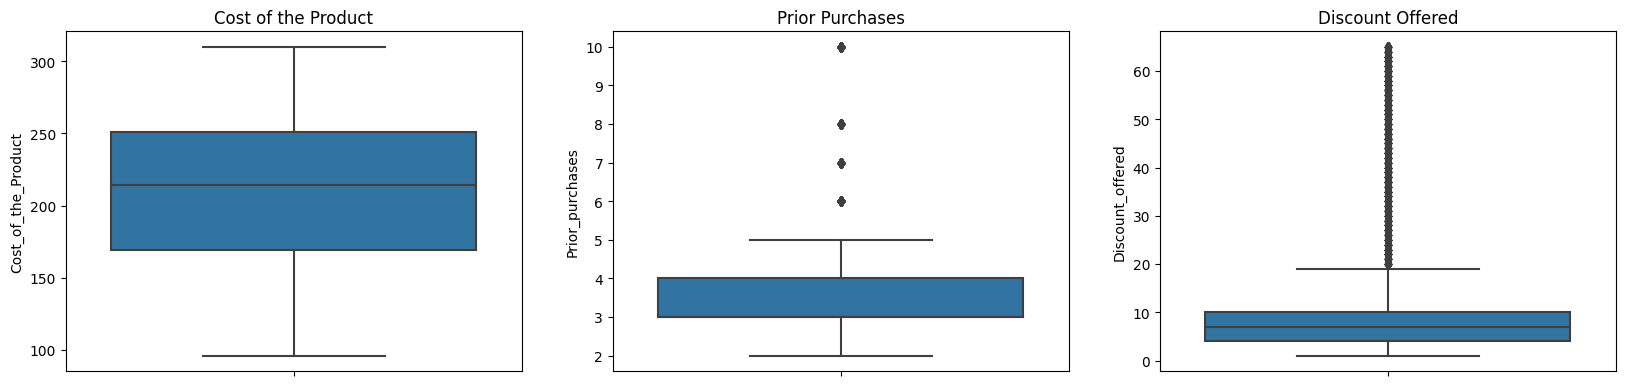

In [26]:
# visualizations
#outliers in split graphs
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.title('Cost of the Product')
sns.boxplot(y=df['Cost_of_the_Product'])
plt.subplot(3,3,2)
plt.title('Prior Purchases')
sns.boxplot(y=df['Prior_purchases'])
plt.subplot(3,3,3)
plt.title('Discount Offered')
sns.boxplot(y=df['Discount_offered'])
plt.show()